# Exploratory Data Analysis
In this script we wish to explore the dataset and analysis on the features

In [4]:
# Import useful packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

In [5]:
# Import custom functions
from scripts.proj1_helpers import *
from scripts.clean_data import *


In [6]:
data_path = 'data/train.csv'
y, x, ids = load_csv_data(data_path, sub_sample=False)

print('Size of x:', x.shape )

Size of x: (250000, 30)


In [7]:
print(x)

[[ 138.47    51.655   97.827 ...    1.24    -2.475  113.497]
 [ 160.937   68.768  103.235 ... -999.    -999.      46.226]
 [-999.     162.172  125.953 ... -999.    -999.      44.251]
 ...
 [ 105.457   60.526   75.839 ... -999.    -999.      41.992]
 [  94.951   19.362   68.812 ... -999.    -999.       0.   ]
 [-999.      72.756   70.831 ... -999.    -999.       0.   ]]


1. First off all we that we have a lot of values that are set to -999, which can be regarded as undefined.
2. By looking at the data we can see that the feature PRI_jet_num is a categorical feature, and have values 0-3. All others are continious.

To study the distribution of each feature, we plot the distribution of each feature. 

In [8]:
## MAYBE TODO: Plot distribution

In [9]:
# MAYBE TODO: DO PRINCIPLE COMPONENT ANALYSIS

**Correlation Matrix**

In [10]:
pred = np.c_[y,x]
correlation = pd.DataFrame(data=pred).corr()

In [11]:
data = pd.read_csv(data_path)
data['Prediction'].replace('s',1, inplace = True)
data['Prediction'].replace('b',-1, inplace = True)
correlation = data.corr()

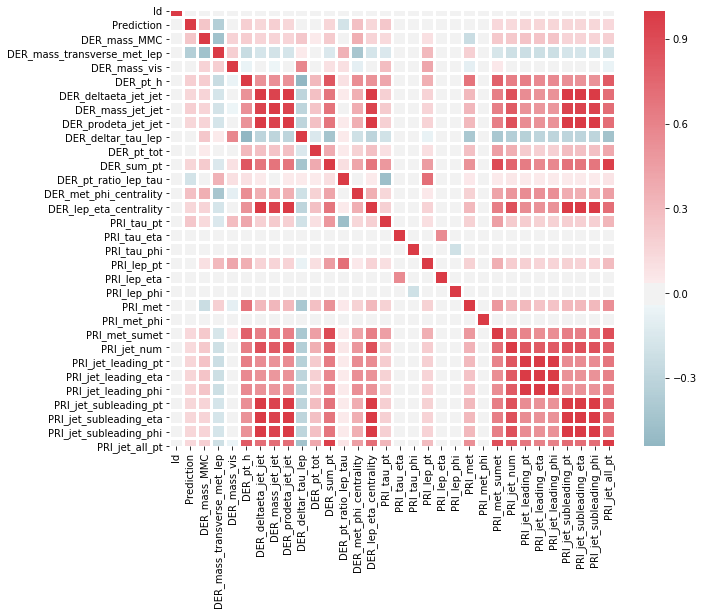

In [12]:
import seaborn as sns
f = plt.figure(figsize = (10,8))
sns.heatmap(correlation, cmap=sns.diverging_palette(220, 10, as_cmap=True), center = 0,  linewidths='2')

We see that some of the features are uncorrelated with the prediction, so we can remove these as they can cause overfitting and issues in the model.  